In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [3]:
caminho_do_arquivo = '/content/drive/MyDrive/ufmg/2025.2/musica_ext/dataBase/'

df_realbook = pd.read_csv(caminho_do_arquivo + 'musicas_realbook_completo_melhorado.csv')
df_relatorio= pd.read_csv(caminho_do_arquivo + 'relatorio_downloads.csv')

In [9]:
df_relatorio['status'].value_counts()

,count
status,
Sucesso (Verificado),770
Falha (erro no download),9
Falha (vídeo não encontrado),6


In [7]:
pd.set_option('display.max_colwidth', None)
df_relatorio[df_relatorio['status'] == 'Falha (erro no download)']

,musica_buscada,titulo_video_encontrado,status
18,Люблю / Вдыхая розы аромат Ефим Розенфельд,Люблю / Вдыхая розы аромат (муз. Ефима Розенфельда - ст. Н. Венгерской),Falha (erro no download)
29,Сердце / Как много девушек хороших Василий Лебедев-Кумач,"Как много девушек хороших Стихи: Василий Лебедев-Кумач 1934 Исполняет группа ""Премьер-Министр""",Falha (erro no download)
322,Have You Met Miss Jones? Richard Rodgers,"Have you met miss Jones - Richard Rodgers (F key, Swing)",Falha (erro no download)
333,How About You ? Burton Lane,How about you?,Falha (erro no download)
334,How Deep Is the Ocean? Irving Berlin,How Deep Is the Ocean,Falha (erro no download)
339,How Do You Say Auf Wiedersehen? Tony Scibetta,Mel Tormé & George Shearing - How Do You Say Auf Wiedersehen? (Scibetta / Mercer),Falha (erro no download)
342,How Long Has This Been Going On? George Gershwin,06.- How Long Has This Been Going On? - George Gershwin - The Very Best Of,Falha (erro no download)
373,I Wish You Love (Que reste-t-il de nos amours?) Léo Chauliac,Tatiana Eva-Marie & Avalon Jazz Band - Que reste-t-il de nos amours? (Charles Trenet),Falha (erro no download)
762,Who Can I Turn To? Anthony Newley,Who Can I turn To (remastered audio) - Anthony Newley,Falha (erro no download)


In [10]:
df_relatorio.loc[df_relatorio['status'] == 'Falha (erro no download)', 'status'] = 'Sucesso (Verificado)'

Text(0, 0.5, 'Status do Autor')

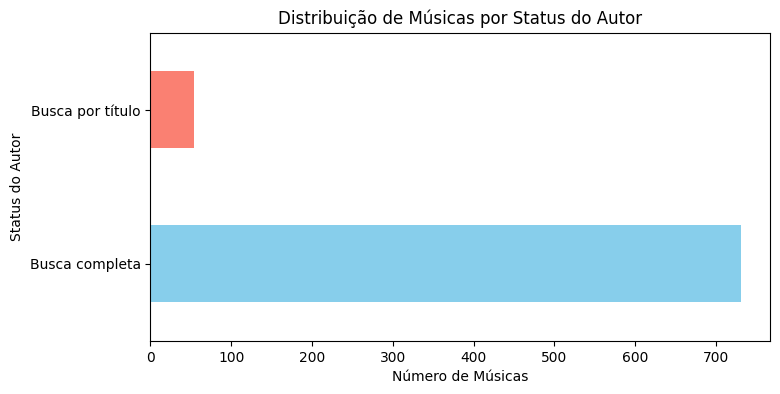

In [11]:
import matplotlib.pyplot as plt

df_realbook['Status Autor'] = df_realbook['Autor'].apply(
    lambda x: 'Busca completa' if pd.notna(x) and x.strip() != '' else 'Busca por título'
)

# Conta a frequência de cada categoria
contagem_status = df_realbook['Status Autor'].value_counts()

# --- CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(8, 4)) # Define o tamanho da figura
contagem_status.plot(
    kind='barh', # Tipo de gráfico de barras horizontais
    color=['skyblue', 'salmon'] # Cores para as barras
)

# Adiciona os rótulos e título
plt.title('Distribuição de Músicas por Status do Autor')
plt.xlabel('Número de Músicas')
plt.ylabel('Status do Autor')


In [12]:
contagem_status

,count
Status Autor,
Busca completa,731
Busca por título,54


In [13]:
df_relatorio['status'].value_counts()

,count
status,
Sucesso (Verificado),779
Falha (vídeo não encontrado),6


In [15]:
df_relatorio[df_relatorio['status'] == 'Falha (vídeo não encontrado)']

,musica_buscada,titulo_video_encontrado,status
0,Вальс расставания Я.Френкель,NaN,Falha (vídeo não encontrado)
1,А снег идёт Андрей Эшпай,NaN,Falha (vídeo não encontrado)
2,Весна идёт И. Дунаевский,NaN,Falha (vídeo não encontrado)
3,Бомбардировщики Jimmy McHugh,NaN,Falha (vídeo não encontrado)
397,Imagination Jimmy Van Heusel,NaN,Falha (vídeo não encontrado)
514,Mustang Gennadiy Bondarev,NaN,Falha (vídeo não encontrado)


In [16]:
df_sucesso = df_relatorio[df_relatorio['status'] == 'Sucesso (Verificado)']

In [17]:
# Instala a biblioteca principal
! pip install thefuzz

# Instala o pacote opcional para melhor performance
! pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.5 MB/s eta 0:00:00


In [20]:
import pandas as pd
from thefuzz import fuzz
import re

# Carrega o seu arquivo de relatório
try:
    df_relatorio = df_sucesso
except FileNotFoundError:
    print("ERRO: Arquivo 'relatorio_downloads.csv' não encontrado. Usando DataFrame de exemplo.")
    # DataFrame de exemplo com seus dados para teste
    dados_exemplo = {
        'musica_buscada': ['Главное ребята сердцем не стареть А. Пахмутова', 'В парке Чаир К. Листов', 'Да разве сердце позабудет Александра Пахмутова'],
        'titulo_video_encontrado': ['Александра Пахмутова. Главное, ребята, сердцем не стареть. Поет Владислав Коннов (1977)', 'К.Листов, слова П.Арского В парке Чаир, солист Игорь Балакирев', 'Эдуард Хиль "Да разве сердце позабудет" (1982)'],
        'status': ['Sucesso', 'Sucesso', 'Sucesso']
    }
    df_relatorio = pd.DataFrame(dados_exemplo)


def limpar_string(texto):
    """
    Função para pré-processar as strings antes da comparação.
    VERSÃO ATUALIZADA para funcionar com qualquer alfabeto (ex: Cirílico).
    """
    if not isinstance(texto, str):
        return ""

    # 1. Converte para minúsculas
    texto = texto.lower()

    # 2. Remove palavras-chave comuns de vídeo (incluindo conteúdo entre parênteses/colchetes)
    palavras_para_remover = [
        'official', 'video', 'audio', 'lyric', 'lyrics', 'hd', '4k',
        'remastered', 'clipe', 'oficial', 'full', 'album', 'hq', 'live',
        r'\[.*?\]', r'\(.*?\)'
    ]
    for palavra in palavras_para_remover:
        texto = re.sub(palavra, '', texto)

    # Remove pontuações e caracteres especiais, mantendo letras de QUALQUER alfabeto e números.
    # A expressão '[^\w\s]' significa "qualquer coisa que não seja um caractere de palavra ou um espaço".
    texto = re.sub(r'[^\w\s]', '', texto)

    # 4. Remove espaços extras que possam ter sido criados
    texto = ' '.join(texto.split())

    return texto

# --- Início do Processo de Análise (mesmo de antes) ---

# 1. Aplica a nova função de limpeza
df_relatorio['busca_limpa'] = df_relatorio['musica_buscada'].apply(limpar_string)
df_relatorio['titulo_limpo'] = df_relatorio['titulo_video_encontrado'].apply(limpar_string)

# 2. Calcula a similaridade com a nova limpeza
df_relatorio['similaridade'] = df_relatorio.apply(
    lambda row: fuzz.token_set_ratio(row['busca_limpa'], row['titulo_limpo']),
    axis=1
)

# 3. Exibe o resultado corrigido
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

print("Relatório com a Análise de Similaridade CORRIGIDA:")
print(df_relatorio[[
    'musica_buscada',
    'titulo_video_encontrado',
    'similaridade'
]].sort_values(by='similaridade', ascending=False))

Relatório com a Análise de Similaridade CORRIGIDA:
                                musica_buscada                                                                               titulo_video_encontrado  similaridade
782      You Make Me Feel So Young Josef Myrow                                                            You Make me Feel so Young - by Josef Myrow           100
780     You Can Depend On Me Charles Carpenter                                                                                  You can depend on me           100
778       You Made Me Love You James V. Monaco                                                                                  You Made Me Love You           100
760             When you`re smiling Larry Shay                           Larry Shay, Mark Fisher, Joe Goodwin: When You're Smiling arr. by Tom Kubis           100
758  When Will the Blues Leave Ornette Coleman                                          Ornette Coleman - When Will The Blues Leave (O

In [22]:
df_relatorio.head()

,musica_buscada,titulo_video_encontrado,status,busca_limpa,titulo_limpo,similaridade
4,Главное ребята сердцем не стареть А. Пахмутова,"Александра Пахмутова. Главное, ребята, сердцем не стареть. Поет Владислав Коннов (1977)",Sucesso (Verificado),главное ребята сердцем не стареть а пахмутова,александра пахмутова главное ребята сердцем не стареть поет владислав коннов,98
5,В парке Чаир К. Листов,"К.Листов, слова П.Арского В парке Чаир, солист Игорь Балакирев",Sucesso (Verificado),в парке чаир к листов,клистов слова парского в парке чаир солист игорь балакирев,73
6,Да разве сердце позабудет Александра Пахмутова,"Эдуард Хиль ""Да разве сердце позабудет"" (1982)",Sucesso (Verificado),да разве сердце позабудет александра пахмутова,эдуард хиль да разве сердце позабудет,81
7,"Гори, гори, моя звезда Пётр Булахов",Булахов Чуевский Гори гори моя звезда Сергей Лемешев 1940,Sucesso (Verificado),гори гори моя звезда пётр булахов,булахов чуевский гори гори моя звезда сергей лемешев 1940,90
8,Джон Грей Матвей Блантер,"""ДЖОН ГРЕЙ"" - Матвей Блантер, Владимир Масс. Поет Даниил Кручинин",Sucesso (Verificado),джон грей матвей блантер,джон грей матвей блантер владимир масс поет даниил кручинин,100


Gerando Gráfico 1: Histograma de Similaridade...


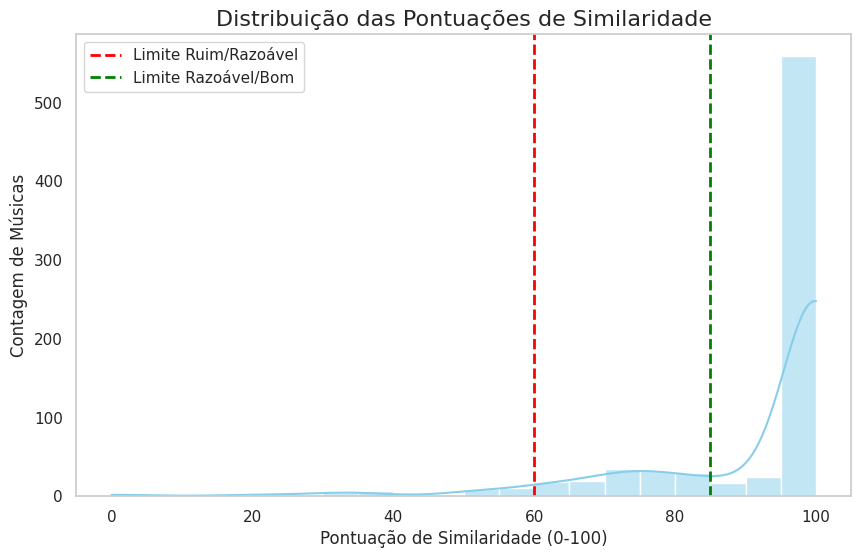

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configurações de Estilo ---
# Define um estilo visual mais agradável para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para as figuras

df = df_relatorio.copy()
# --- Preparação dos Dados para Análise ---
# Vamos criar uma nova coluna categórica para facilitar a visualização

# Define os limites para cada categoria
bins = [0, 60, 85, 101]
# Define os nomes para cada categoria
labels = ['Ruim (<60)', 'Razoável (60-85)', 'Bom (>85)']

# A função pd.cut segmenta os dados numéricos em categorias
df['qualidade'] = pd.cut(df['similaridade'], bins=bins, labels=labels, right=False)

# -----------------------------------------------------------------------------
# GRÁFICO 1: HISTOGRAMA DE SIMILARIDADE (O que você pediu)
# -----------------------------------------------------------------------------
print("Gerando Gráfico 1: Histograma de Similaridade...")
plt.figure() # Cria uma nova figura para o gráfico
ax = sns.histplot(data=df, x='similaridade', kde=True, bins=20, color='skyblue')
ax.set_title('Distribuição das Pontuações de Similaridade', fontsize=16)
ax.set_xlabel('Pontuação de Similaridade (0-100)', fontsize=12)
ax.set_ylabel('Contagem de Músicas', fontsize=12)

# Adiciona linhas verticais para marcar nossas categorias
plt.axvline(x=60, color='red', linestyle='--', linewidth=2, label='Limite Ruim/Razoável')
plt.axvline(x=85, color='green', linestyle='--', linewidth=2, label='Limite Razoável/Bom')
plt.grid(False)
plt.legend()
plt.show()

In [28]:
(df_relatorio[df_relatorio['similaridade'] < 60]).shape[0]/df_relatorio.shape[0]

0.05648267008985879

In [29]:
(df_relatorio[df_relatorio['similaridade'] > 85]).shape[0]/df_relatorio.shape[0]

0.766367137355584

Gerando Gráfico de Barras de Proporção por Categoria...


/tmp/ipython-input-2121186212.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


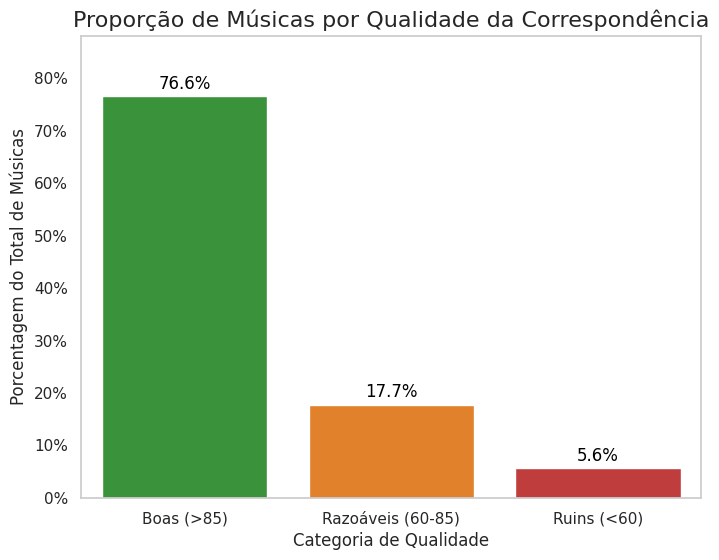

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # Usaremos para formatar o eixo Y como porcentagem

# --- 1. Cálculo dos Percentuais ---
# Pega o número total de músicas para o cálculo da proporção
total_musicas = df_relatorio.shape[0]

# Usa exatamente a sua lógica para calcular as proporções
pct_boas = (df_relatorio[df_relatorio['similaridade'] > 85]).shape[0] / total_musicas
pct_ruins = (df_relatorio[df_relatorio['similaridade'] < 60]).shape[0] / total_musicas

# Calcula a proporção restante para a categoria "Razoáveis"
condicao_razoaveis = (df_relatorio['similaridade'] >= 60) & (df_relatorio['similaridade'] <= 85)
pct_razoaveis = df_relatorio[condicao_razoaveis].shape[0] / total_musicas

# --- 2. Preparação dos Dados para o Gráfico ---
# Cria um novo DataFrame com os dados calculados, ideal para plotagem
dados_grafico = pd.DataFrame({
    'Categoria': ['Boas (>85)', 'Razoáveis (60-85)', 'Ruins (<60)'],
    'Porcentagem': [pct_boas, pct_razoaveis, pct_ruins]
})

# --- 3. Geração do Gráfico ---
print("Gerando Gráfico de Barras de Proporção por Categoria...")

# Define um tamanho agradável para a figura
plt.figure(figsize=(8, 6))

# Cria o gráfico de barras com cores consistentes
ax = sns.barplot(
    data=dados_grafico,
    x='Categoria',
    y='Porcentagem',
    order=['Boas (>85)', 'Razoáveis (60-85)', 'Ruins (<60)'], # Define a ordem das barras
    palette={'Boas (>85)': '#2ca02c', 'Razoáveis (60-85)': '#ff7f0e', 'Ruins (<60)': '#d62728'} # Verde, Laranja, Vermelho
)

# --- 4. Melhorias e Anotações ---
# Formata o eixo Y para exibir em porcentagem
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Adiciona os rótulos de porcentagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', # Formata o número como porcentagem com 1 casa decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9),
                textcoords='offset points')

# Define os títulos e rótulos dos eixos
ax.set_title('Proporção de Músicas por Qualidade da Correspondência', fontsize=16)
ax.set_xlabel('Categoria de Qualidade', fontsize=12)
ax.set_ylabel('Porcentagem do Total de Músicas', fontsize=12)

# Ajusta o limite do eixo Y para dar espaço aos rótulos
ax.set_ylim(0, max(dados_grafico['Porcentagem']) * 1.15)

# Exibe o gráfico
plt.grid(False)
plt.show()

In [27]:
boa_similaridade = df_relatorio[df_relatorio['similaridade'] > 85]
boa_similaridade.to_csv(caminho_do_arquivo + 'musicas_com_boa_similaridade.csv', index=False)